In [1]:
#Import all the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Step 1: Reading and Understanding the Data

In [2]:
#Read the data
df = pd.read_csv(r'day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.rename(columns = {'yr':'year', 'hum':'humidity', 'cnt':'count'}, inplace = True)

In [6]:
cpy_df = df.copy()
cpy_df.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
cpy_df.shape

(730, 16)

In [8]:
cpy_df.nunique()

instant       730
dteday        730
season          4
year            2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
count         695
dtype: int64

In [9]:
cpy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
cpy_df.describe()

,instant,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

##### Dropping irrelevant columns
-  Instant - record index not needed for prediction
-  dteday - We have year/month/weekday cols so this is redundant
-  causal/registered - this adds upto the target variable count so not required

In [11]:
cpy_df.drop(['instant', 'dteday', 'casual', 'registered'],axis=1 ,inplace=True)
cpy_df.head()

,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Checking any null data present in dataframe
-  No Null values found

In [12]:
cpy_df.isna().sum()

season        0
year          0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

##### Dropping any duplicate records if present
-  No Duplicate Records found

In [13]:
cpy_df.drop_duplicates(inplace=True)
cpy_df.shape

(730, 12)

## Step 3: Data Transforming

In [14]:
cpy_df.head()

,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Tranforming into categorical data for better understanding and it will also help in visualization and feature creation

In [15]:
cpy_df.season = cpy_df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
cpy_df.year = cpy_df.year.map({0: 2018, 1:2019})
cpy_df.mnth = cpy_df.mnth.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', \
                               9:'September', 10:'October', 11:'November', 12:'December'})
cpy_df.weathersit = cpy_df.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
cpy_df.weekday = cpy_df.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [16]:
cpy_df.head()

,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,2018,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization

#### Visualizing Numerical Data

<Figure size 1000x1000 with 0 Axes>

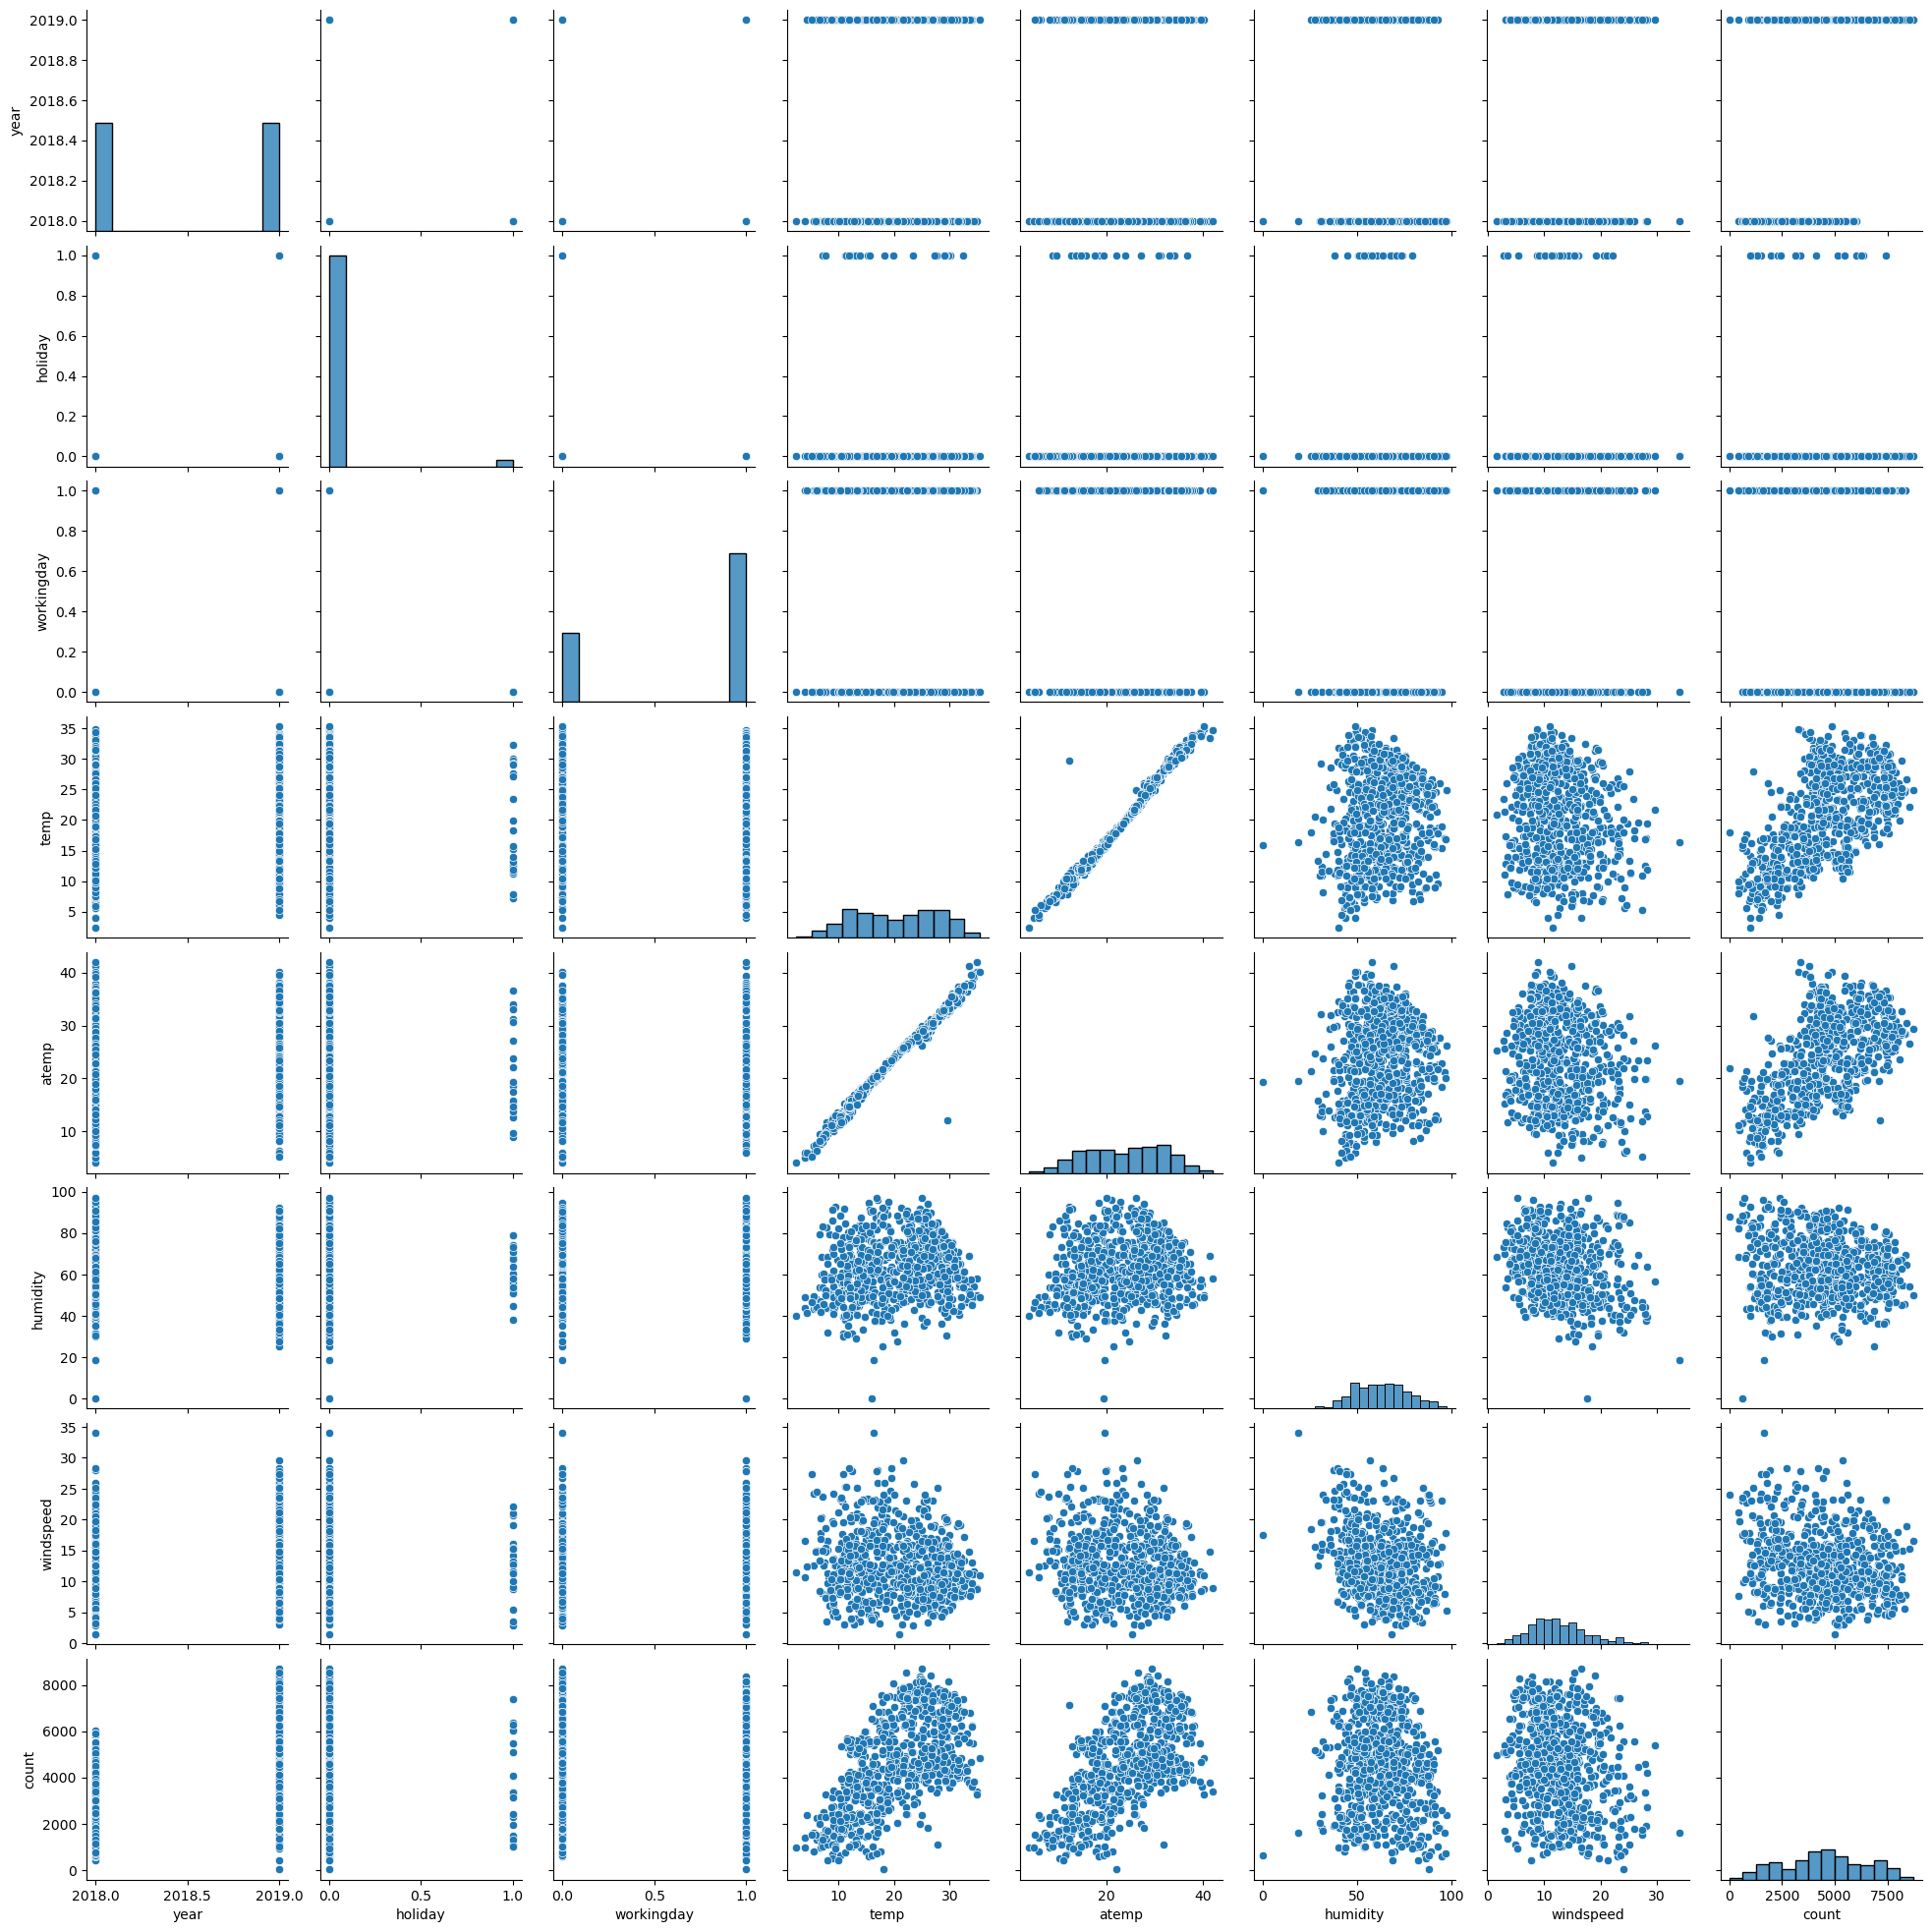

In [17]:
#Finding the correlation between the numeric feature by plotting pair plot
plt.figure(figsize=(10,10))
sns.pairplot(cpy_df, kind='scatter')
plt.show()

###### We can observe a good linear relationship between count and `temp` and `atemp` and `count`

### Visualizing categorical variables

In [18]:
def categorical_boxplots(feature):
    plt.figure(figsize=(15,3))
    sns.boxplot(data=cpy_df, x=feature, y='count', hue='year')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
    
def categorical_barplots(feature):
    plt.figure(figsize=(15,3))
    sns.barplot(data=cpy_df, x=feature, y='count', hue='year')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()     

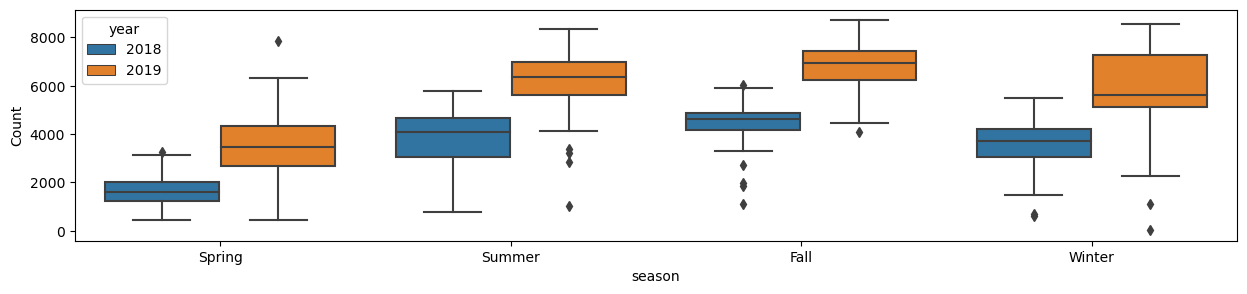

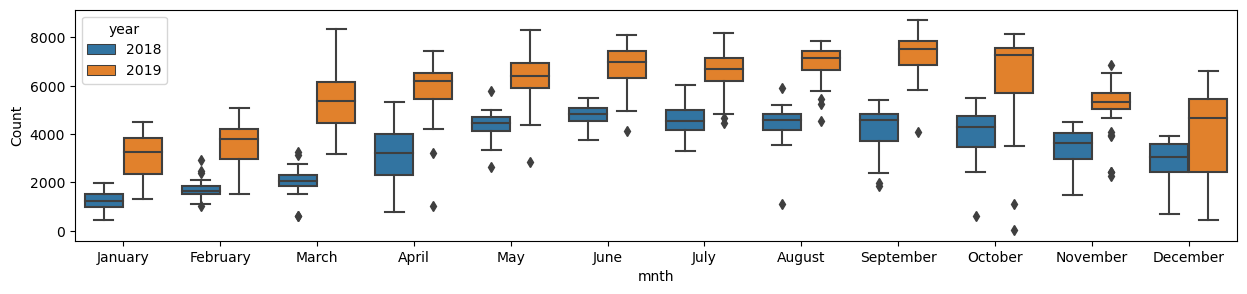

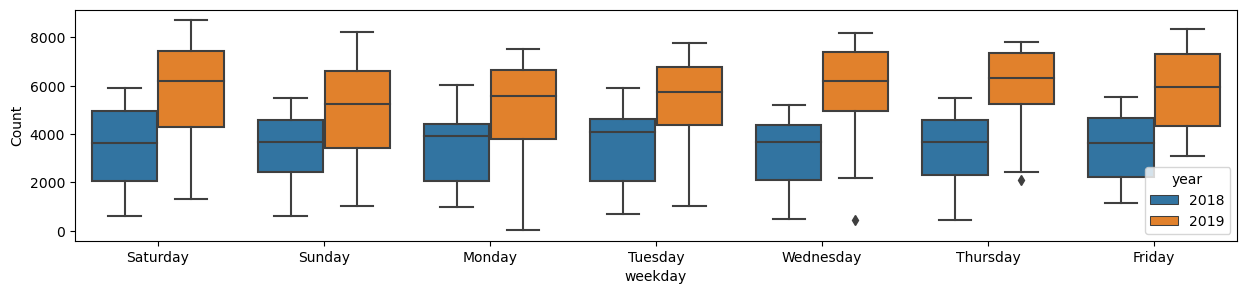

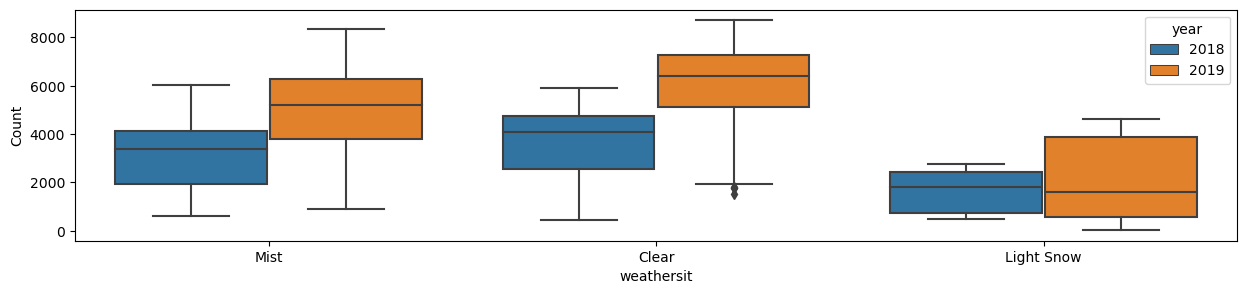

In [19]:
cat_vars = ['season', 'mnth', 'weekday', 'weathersit']

for var in cat_vars:
    categorical_boxplots(var)

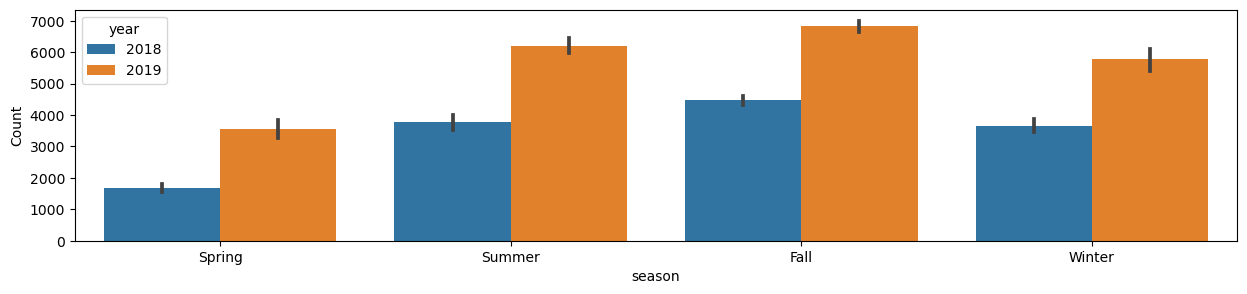

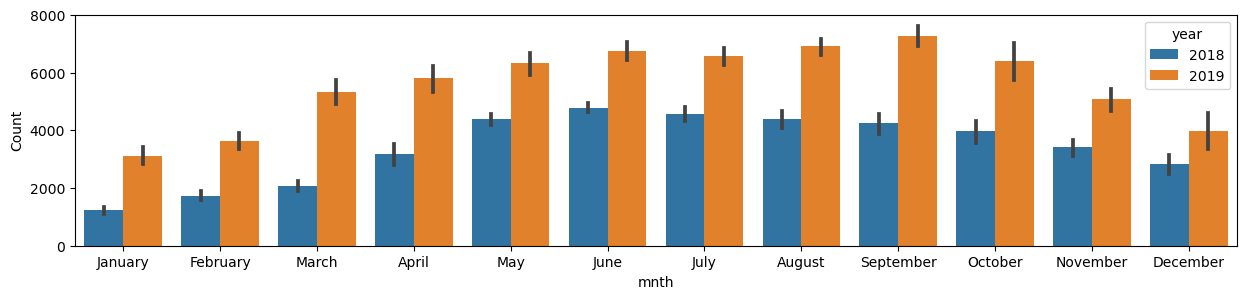

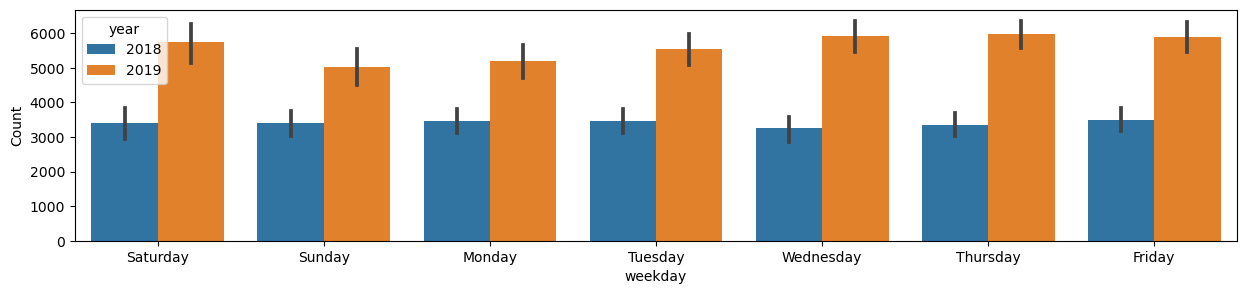

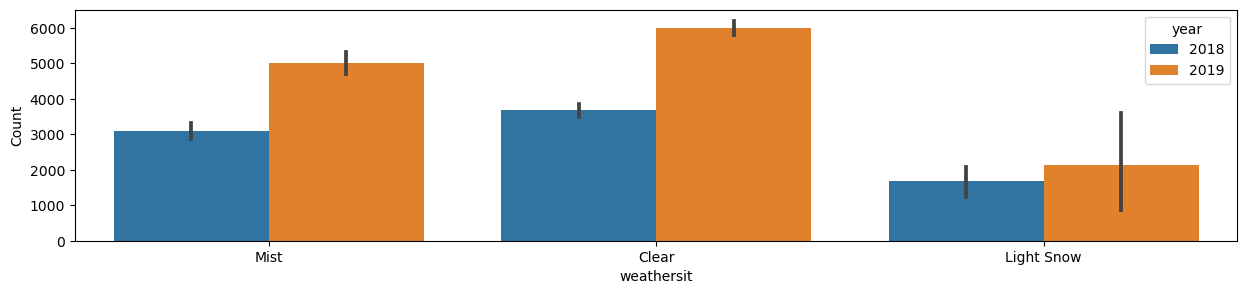

In [20]:
for var in cat_vars:
    categorical_barplots(var)

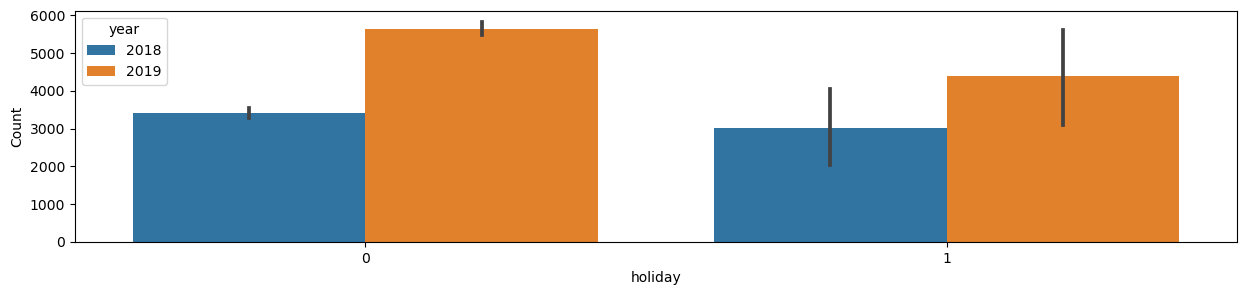

In [21]:
categorical_barplots('holiday')

### Observations

-  Fall season has more more bookings than any other season and has increased with increase in year aswell.
-  Most of the bookings gradually starts rising from the begining of the year, highest bookings are observed in May, June, July, August and September and then gradually starts to decline.
-  Clear weather attracts more booking than any outhet weather.
-  For holiday demand seems to dropped, which seems reasonable, people might spend sometime with family. 
-  year 2019 has more number of booking from the previous year, which shows good progress in terms of business.


## Step 4 : Data Preparation

##### Creating Dummy Features
-  Creating dummies for features which has levels greater than 2
-  Not considering the features which are binary in nature for dummy creation
-  Merging the new dataframe to the original dataframe after creating the dummy
-  Also dropping the col from which the new features are created

In [22]:
cpy_df.head()

,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,2018,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
#Again converting into binary form after visualization
cpy_df.year = cpy_df.year.map({2018: 0, 2019:1})

In [24]:
cpy_df.head()

,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
def create_dummies(variable):
    global cpy_df
    feat_var = pd.get_dummies(cpy_df[variable], dtype=int, drop_first=True)
    print(feat_var.head())
    cpy_df = pd.concat([cpy_df, feat_var], axis=1)
    cpy_df.drop(variable, axis=1, inplace=True)
    print(cpy_df.head())

In [26]:
create_dummies('season')

   Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   year     mnth  holiday    weekday  workingday weathersit       temp  \
0     0  January        0   Saturday           0       Mist  14.110847   
1     0  January        0     Sunday           0       Mist  14.902598   
2     0  January        0     Monday           1      Clear   8.050924   
3     0  January        0    Tuesday           1      Clear   8.200000   
4     0  January        0  Wednesday           1      Clear   9.305237   

      atemp  humidity  windspeed  count  Spring  Summer  Winter  
0  18.18125   80.5833  10.749882    985       1       0       0  
1  17.68695   69.6087  16.652113    801       1       0       0  
2   9.47025   43.7273  16.636703   1349       1       0       0  
3  10.60610   59.0435  10.739832   1562       1       0       0  
4  11.46350   43.6957  12.522300   1600       1       0       0  


In [27]:
create_dummies('mnth')

   August  December  February  January  July  June  March  May  November  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   October  September  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  
   year  holiday    weekday  workingday weathersit       temp     atemp  \
0     0        0   Saturday           0       Mist  14.110847  18.18125   
1     0        0     Sunday           0       Mist  14.902598  17.68695   
2     0        0     Monday           1      Clear   8.050924   9.47025   
3     0        0    Tuesday           1      Clear   8.200000  10.60610   
4     0        0  Wednes

In [28]:
create_dummies('weekday')

   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1
   year  holiday  workingday weathersit       temp     atemp  humidity  \
0     0        0           0       Mist  14.110847  18.18125   80.5833   
1     0        0           0       Mist  14.902598  17.68695   69.6087   
2     0        0           1      Clear   8.050924   9.47025   43.7273   
3     0        0           1      Clear   8.200000  10.60610   59.0435   
4     0        0           1      Clear   9.305237  11.46350   43.6957   

   windspeed  count  Spring  Summer  Winter  August  December  February  \
0  10.749882    985       1       0       0       0         0         0   
1  16.652113    801       1       0       0       0      

In [29]:
create_dummies('weathersit')

   Light Snow  Mist
0           0     1
1           0     1
2           0     0
3           0     0
4           0     0
   year  holiday  workingday       temp     atemp  humidity  windspeed  count  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882    985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113    801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   1600   

   Spring  Summer  Winter  August  December  February  January  July  June  \
0       1       0       0       0         0         0        1     0     0   
1       1       0       0       0         0         0        1     0     0   
2       1       0       0       0         0         0        1     0     0   
3       1       0       0       0         0         0        1     0     0   
4  

In [30]:
print(cpy_df.shape)

(730, 30)


### Splitting the Data into Training and Testing Sets

In [31]:
df_train, df_test = train_test_split(cpy_df, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
df_train.shape

(510, 30)

In [33]:
df_test.shape

(219, 30)

### Rescaling the Features
We will use MinMax scaling.

In [34]:
scaler = MinMaxScaler()

In [35]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


##### MinMaxScaler will scale the variable between 0 and 1

In [36]:
scalable_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [37]:
df_train[scalable_vars] = scaler.fit_transform(df_train[scalable_vars])

In [38]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('count')
X_train = df_train

In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [41]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Step 5 : Model Building
-  Using RFE for eliminating most correlated features
-  Taking no of features to be selected as 15

In [42]:
#Creating the instance
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)

In [43]:
#Running RFE
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [44]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 8),
 ('December', False, 3),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', False, 4),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

##### Selected Features using RFE

In [45]:
cols = X_train.columns[selector.support_]
cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Spring', 'Summer', 'Winter', 'July', 'September', 'Saturday', 'Sunday',
       'Light Snow', 'Mist'],
      dtype='object')

##### Dropped Features by RFE Selection

In [46]:
X_train.columns[~selector.support_]

Index(['atemp', 'August', 'December', 'February', 'January', 'June', 'March',
       'May', 'November', 'October', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [47]:
def vif_calculation(dataframe):
    vif = pd.DataFrame()
    X = dataframe.copy()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [48]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[cols]

##### Adding Constant to the RFE Dataframe

In [49]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,workingday,temp,humidity,windspeed,Spring,Summer,Winter,July,September,Saturday,Sunday,Light Snow,Mist
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


In [50]:
#Creating first model
model1 = sm.OLS(y_train, X_train_rfe).fit()
print(model1.summary())

print('                                     ')
print('------Variance Inflation Factor------')

#Calculating VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        16:10:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

##### Feature Holiday has high P-value 0f 0.373, also has VIF as inf, this feature needs to be dropped

In [51]:
X_train_rfe.drop('holiday', axis=1, inplace=True)

#Recreating model after dropping holiday
model2 = sm.OLS(y_train, X_train_rfe).fit()
print(model2.summary())

print('                                     ')
print('------Variance Inflation Factor------')

# Calculation VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        16:11:29   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

##### Feature workingday has high VIF value 0f 9.07, this feature needs to be dropped

In [52]:
X_train_rfe.drop('workingday', axis=1, inplace=True)

#Recreating model after dropping workingday
model3 = sm.OLS(y_train, X_train_rfe).fit()
print(model3.summary())

print('                                     ')
print('------Variance Inflation Factor------')

# Calculation VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.36e-189
Time:                        16:11:31   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2797      0.035      8.080      0.0

##### Feature Saturday has high P-value 0f 0.218, this feature needs to be dropped

In [53]:
X_train_rfe.drop('Saturday', axis=1, inplace=True)

#Recreating model after dropping Saturday
model4 = sm.OLS(y_train, X_train_rfe).fit()
print(model4.summary())

print('                                     ')
print('------Variance Inflation Factor------')

#Calculation VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.31e-190
Time:                        16:11:34   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2833      0.035      8.208      0.0

##### Feature Spring has slightly high VIF-value 0f 5.01, this feature needs to be dropped

In [54]:
X_train_rfe.drop('Spring', axis=1, inplace=True)

#Recreating model after dropping Spring
model5 = sm.OLS(y_train, X_train_rfe).fit()
print(model5.summary())

print('                                     ')
print('------Variance Inflation Factor------')

#Calculation VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.40e-190
Time:                        16:11:36   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.027      8.262      0.0

##### Feature July has slightly high P-value 0f 0.016 compare to other varaiables, this feature needs to be dropped

In [55]:
X_train_rfe.drop('July', axis=1, inplace=True)

#Recreating model after dropping July
model6 = sm.OLS(y_train, X_train_rfe).fit()
print(model6.summary())

print('                                     ')
print('------Variance Inflation Factor------')

#Calculation VIF for current Features
vif_calculation(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.04e-189
Time:                        16:11:38   Log-Likelihood:                 501.89
No. Observations:                 510   AIC:                            -981.8
Df Residuals:                     499   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.027      8.222      0.0

##### Latest Train Model Obeservation:
-  `R-square` value is good : `0.838`
-  `Adjusted R-square` value is good : `0.834` which is close to R-square
-  `P-value` for every feature is low means the features are significant in nature
-  `VIF` for every feature is below `5`, so every feature in significant in nature

In [56]:
#Checking paramters coefficient values
round(model6.params, 3)

const         0.223
year          0.229
temp          0.574
humidity     -0.166
windspeed    -0.187
Summer        0.091
Winter        0.140
September     0.101
Sunday       -0.043
Light Snow   -0.239
Mist         -0.053
dtype: float64

## Step 6 : Residual Analysis

In [57]:
y_train_predict = model6.predict(X_train_rfe)

In [58]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [59]:
y_train_predict.head()

653    0.733186
576    0.750147
426    0.499065
728    0.343175
482    0.597898
dtype: float64

In [60]:
res = y_train - y_train_predict

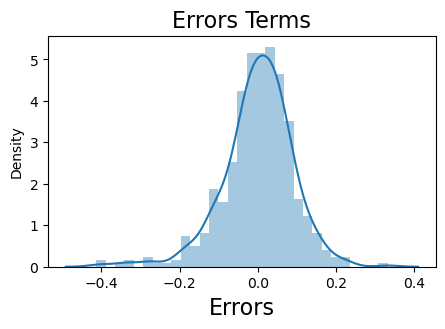

In [61]:
plt.figure(figsize=(5,3))
sns.distplot(res, )
plt.title('Errors Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 16)
plt.show()

##### Distribution is centered around 0 and normal in nature

## Homoscedasticity
-  No visible pattern observed in the variance of residuals, mostly centred around the bestfit line.

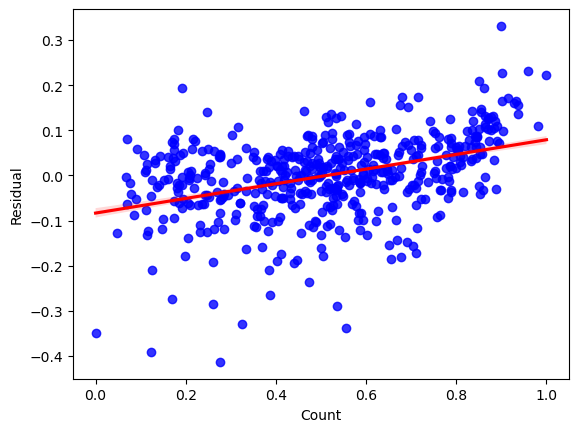

In [62]:
sns.regplot(x=y_train, y=res, fit_reg=True, ci=68, scatter_kws={"color":"blue"}, line_kws={'color':'red'})
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

## Check for multicolinearity

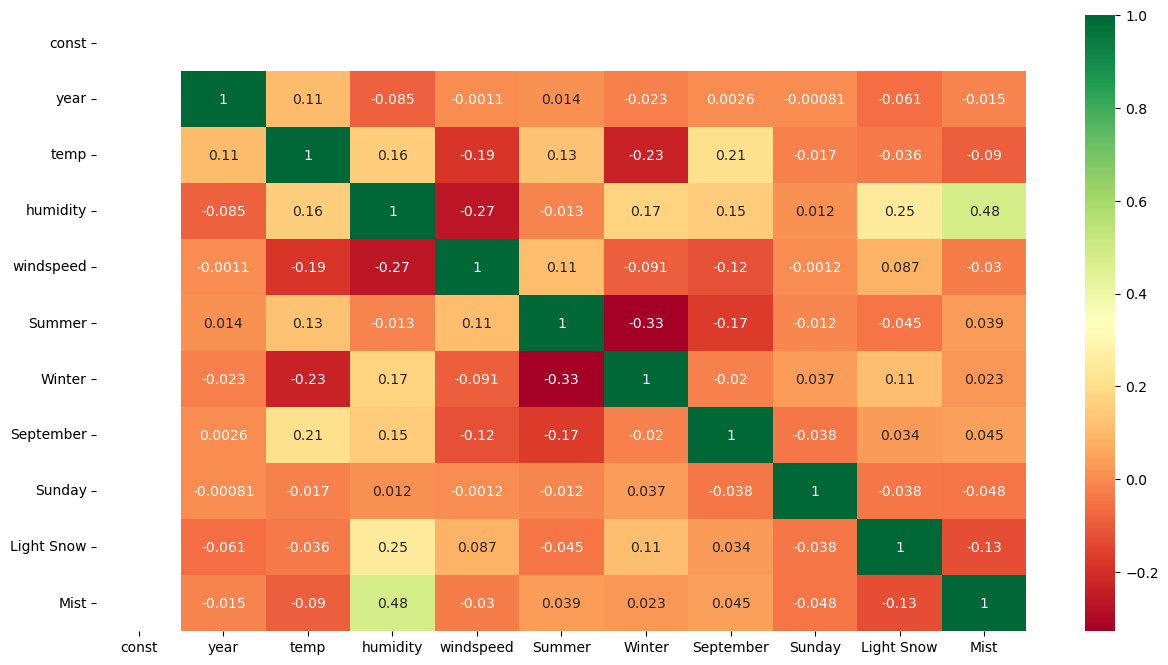

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Step 7 : Model Prediction using final model on test data

In [64]:
# Scaling the test data set
df_test[scalable_vars] = scaler.transform(df_test[scalable_vars])

In [65]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#Dividing test data into X and y set 
y_test = df_test.pop('count')
X_test = df_test

In [67]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [68]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
#Keeping only those cols present in X_train_rfe data
X_train_cols = ['year', 'temp', 'humidity', 'windspeed', 'Summer', 'Winter',
       'September', 'Sunday', 'Light Snow', 'Mist']

In [70]:
X_test_new = X_test[X_train_cols]

In [71]:
X_test_new.head()

,year,temp,humidity,windspeed,Summer,Winter,September,Sunday,Light Snow,Mist
184,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,0,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,0,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,0,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [72]:
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,year,temp,humidity,windspeed,Summer,Winter,September,Sunday,Light Snow,Mist
184,1.0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1.0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [73]:
#making predictions using 6th model
y_test_pred = model6.predict(X_test_new)

In [74]:
#Calculating R2 for test model
r2 = r2_score(y_test, y_test_pred)
print(f'R2 Score for test model: {round(r2,3)}')

#Calculating Adjusted R-Square for test model
adj_r2 = round(1-(1-round(r2,3))*(X_test_new.shape[0])/(X_test_new.shape[0]-X_test_new.shape[1]-1),3)
print(f'Adj-R2 Score for test model: {round(adj_r2,3)}')

R2 Score for test model: 0.803
Adj-R2 Score for test model: 0.792


## Step 8: Model Evaluation

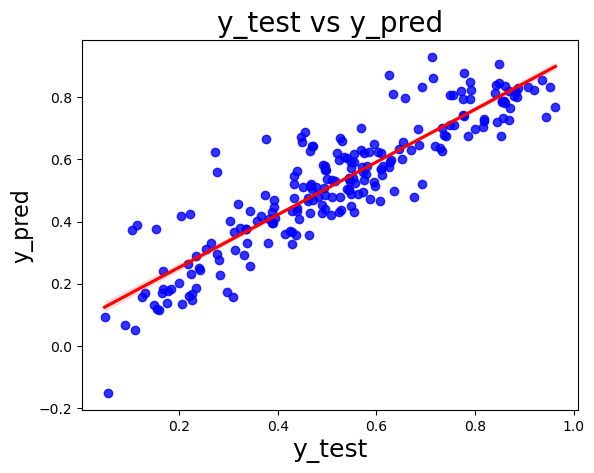

In [75]:
# Plotting y_test and y_test_pred to understand the spread

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()  

## Best Fit Line Equation :

$ count = 0.223 + 0.229 \times year + 0.574 \times temp - 0.166 \times humidity - 0.187 \times windspeed + 0.091 \times Summer + 0.140 \times Winter + 0.101 \times September - 0.043 \times Sunday - 0.239 \times Light Snow - 0.053 \times Mist $


# Comparision between Training and Test Dataset:
-  Train dataset R2          : 0.838
-  Train dataset Adjusted R2 : 0.834   

-  Test dataset R2           : 0.803
-  Test dataset Adjusted R2  : 0.792

### Feature which holds significance in contributing towards the rise in demand for share bike are as follows:
-  Year
-  Temp
-  Humidity
-  Windspeed
-  Summer
-  Winter
-  September
-  Sunday
-  Light Snow
-  Mist